<a href="https://colab.research.google.com/github/ivangd97/2048_game/blob/master/Entrega_bioinspirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6188365313651367189
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4475677261083677834
physical_device_desc: "device: XLA_CPU device"
]


In [73]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print (train_images.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32 , 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(50000, 32, 32, 3)


In [74]:
from keras import layers
from keras import models

model = models.Sequential()
#el 10 es el numero de kernels y (5,5) el tamaño de éstos
#input_shape es el tamaño de cada dato del dataset (tamaño de la imagen)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Dropout(0.3))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_24 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """


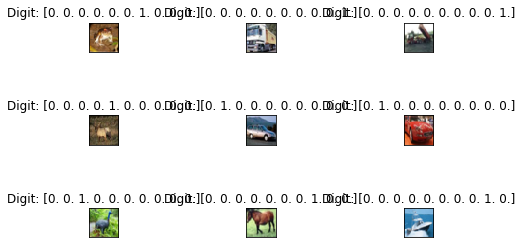

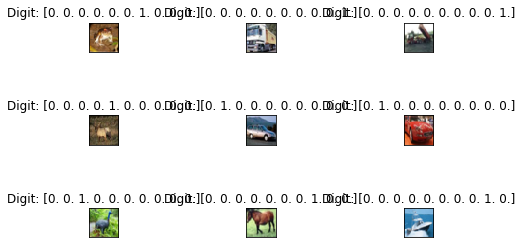

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [68]:
batch_size = 32
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 458us/step - loss: 2.0750 - acc: 0.2327 - val_loss: 2.0627 - val_acc: 0.2633
Epoch 2/10
50000/50000 [==============================] - 21s 424us/step - loss: 1.7376 - acc: 0.3650 - val_loss: 1.6263 - val_acc: 0.4166
Epoch 3/10
50000/50000 [==============================] - 21s 425us/step - loss: 1.5553 - acc: 0.4313 - val_loss: 1.4824 - val_acc: 0.4792
Epoch 4/10
50000/50000 [==============================] - 21s 426us/step - loss: 1.4456 - acc: 0.4724 - val_loss: 1.5950 - val_acc: 0.4556
Epoch 5/10
50000/50000 [==============================] - 21s 429us/step - loss: 1.3670 - acc: 0.5040 - val_loss: 1.3180 - val_acc: 0.5396
Epoch 6/10
50000/50000 [==============================] - 21s 426us/step - loss: 1.2997 - acc: 0.5323 - val_loss: 1.2576 - val_acc: 0.5663
Epoch 7/10
50000/50000 [==============================] - 21s 424us/step - loss: 1.2327 - acc: 0.5586 - val_loss: 1.

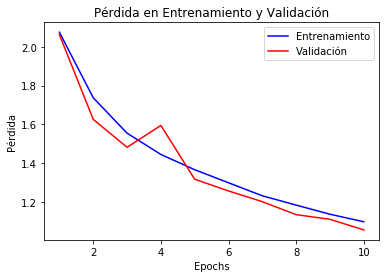

In [69]:
import matplotlib.pyplot as plt
ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

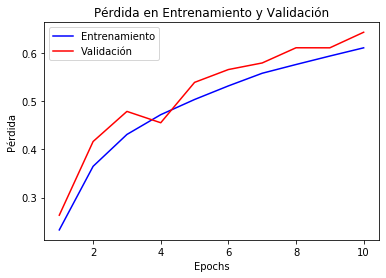

In [70]:
import matplotlib.pyplot as plt

ent_loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()